#Capstone Project Google Data Analytics


Case Study 2: How Can a Wellness Technology Company Play It Smart?<br>
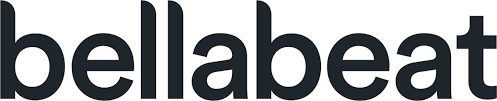

## Phase 1: Ask

### 1.1 Background
Since 2013, Bellabeat has been a leading high-tech manufacturer, crafting exquisitely designed smart products with a strong focus on women's health. Through their products, they strive to inspire and empower women by providing valuable insights into their health and daily habits. As a result of their dedication to technology and wellness, Bellabeat has experienced rapid growth and established itself as a prominent company dedicated to women's well-being.

### 1.2 Business Task
The business task is to analyze smart device data to gain insight into how consumers are using their smart devices. The insights will be used to guide marketing strategy for Bellabeat

### 1.3 Key Stakeholder
Urska Srsen (Co-founder and Chief Creative Officer), Sando Mur (Mathematician and Cofounder), Marketing Analytics Team

## Phase 2: Prepare

### 2.1 Data Source Information
The data source is from Kaggle and is freely accessible, stored in 18 csv files.The data collected includes physical activity recorded in minutes, heart rate, sleep monitors, daily activity and step counts.

### 2.2 Data Organization
 The data is organized as long format, since every user have it's own ID which is used repetitively in some columns.

### 2.3 Dataset Credibility and Bias
The reliability of the data can be confirmed by the numbers of users that the data includes.
However, the data is not original because it is a public data coming from a second party.
The data do contains information about what I am going to discover, but it still lacks of information as it only displays 30 users. Thus, the data is not comprehensive.
The data is taken from 2016, which is 6 years ago and I considered it not current.

### 2.4 Data Integrity
To verify the data integrity, I need to jump into the process phase. Here, I discover that:
The column 'LoggedActivitiesDistance' in dailyActivity data have 0 values and do not inform anything.
In addition, the 'Fat' column in the weightLogInfoData has 65 null values.

I checked the consintencies of user counts in every data. Most of them contains 33 uniqued ids, but 4 dataset does have inconsintencies, which are heartrate_seconds (14), minuteSleep (24), sleepDay (24), and weightLogInfo (8).

## Phase 3: Process

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
os.environ['KAGGLE_USERNAME'] = "izzazzhr"
os.environ['KAGGLE_KEY'] = "46a805a0588dc4e429aabe6505e02c90"

In [ ]:
!kaggle datasets download -d arashnic/fitbit

 54% 13.0M/24.1M [00:00<00:00, 136MB/s]
100% 24.1M/24.1M [00:00<00:00, 168MB/s]


In [ ]:
!unzip -q /content/fitbit.zip

###Load Data

In [ ]:
dailyActivity = pd.read_csv("/content/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
dailyCalories = pd.read_csv("/content/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
dailyIntensities = pd.read_csv("/content/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
dailySteps = pd.read_csv("/content/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
heartrate_seconds=pd.read_csv("/content/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
hourlyCalories = pd.read_csv("/content/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourlyIntensities = pd.read_csv("/content/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourlySteps = pd.read_csv("/content/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
minuteCaloriesNarrow = pd.read_csv("/content/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv")
minuteCaloriesWide = pd.read_csv("/content/Fitabase Data 4.12.16-5.12.16/minuteCaloriesWide_merged.csv")
minuteIntensitiesNarrow = pd.read_csv("/content/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv")
minuteIntensitiesWide = pd.read_csv("/content/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv")
minuteMETsNarrow = pd.read_csv("/content/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")
minuteSleep = pd.read_csv("/content/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")
minuteStepsNarrow = pd.read_csv("/content/Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv")
minuteStepsWide = pd.read_csv("/content/Fitabase Data 4.12.16-5.12.16/minuteStepsWide_merged.csv")
sleepDay = pd.read_csv("/content/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weightLogInfo = pd.read_csv("/content/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")


### 3.1 Data Exploration

View the first 5 rows of some datasets

In [ ]:
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [ ]:
hourlySteps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [ ]:
hourlyCalories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [ ]:
sleepDay.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [ ]:
dailyCalories.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [ ]:
dailyIntensities.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


In [ ]:
weightLogInfo.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [ ]:
dailySteps.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [ ]:
heartrate_seconds.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


View data types

In [ ]:
dailyActivity.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [ ]:
hourlySteps.dtypes

Id               int64
ActivityHour    object
StepTotal        int64
dtype: object

In [ ]:
hourlyCalories.dtypes

Id               int64
ActivityHour    object
Calories         int64
dtype: object

In [ ]:
sleepDay.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

Count unique users in each datasets

In [ ]:
print("Daily Activity Dataset:",dailyActivity.Id.nunique(), "unique users")
print("Hourly Steps Dataset:",hourlySteps.Id.nunique(), "unique users")
print("Hourly Calories Dataset:",hourlyCalories.Id.nunique(), "unique users")
print("SleepDay Dataset:",sleepDay.Id.nunique(), "unique users")
print("Daily Calories Dataset:",dailyCalories.Id.nunique(), "unique users")
print("Daily Intensity Dataset:",dailyIntensities.Id.nunique(), "unique users")
print("Weight Logged Dataset:",weightLogInfo.Id.nunique(), "unique users")
print("Daily Steps Dataset:",dailySteps.Id.nunique(), "unique users")
print("Heart Rate Dataset:",heartrate_seconds.Id.nunique(), "unique users")

Daily Activity Dataset: 33 unique users
Hourly Steps Dataset: 33 unique users
Hourly Calories Dataset: 33 unique users
SleepDay Dataset: 24 unique users
Daily Calories Dataset: 33 unique users
Daily Intensity Dataset: 33 unique users
Weight Logged Dataset: 8 unique users
Daily Steps Dataset: 33 unique users
Heart Rate Dataset: 14 unique users


Check for missing values

In [ ]:
print("Daily Activity Dataset has",dailyActivity.isnull().values.sum(), "missing values")
print("Hourly Steps Dataset has",hourlySteps.isnull().values.sum(), "missing values")
print("Hourly Calories Dataset has",hourlyCalories.isnull().values.sum(), "missing values")
print("SleepDay Dataset has",sleepDay.isnull().values.sum(), "missing values")
print("Daily Calories Dataset has",dailyCalories.isnull().values.sum(), "missing values")
print("Daily Intensity Dataset has",dailyIntensities.isnull().values.sum(), "missing values")
print("Daily Steps Dataset has",dailySteps.isnull().values.sum(), "missing values")
print("Heart Rate Dataset has",heartrate_seconds.isnull().values.sum(), "missing values")

Daily Activity Dataset has 0 missing values
Hourly Steps Dataset has 0 missing values
Hourly Calories Dataset has 0 missing values
SleepDay Dataset has 0 missing values
Daily Calories Dataset has 0 missing values
Daily Intensity Dataset has 0 missing values
Daily Steps Dataset has 0 missing values
Heart Rate Dataset has 0 missing values


### 3.2 Key Findings from Data Exploration:



1.   After analyzing datasets, I found out that `heartrate_seconds`, `weightlogInfo`, and `sleepDay` datasets has users < 30. This indicates that there is a possible missing data from these datasets.
2.   The datasets `dailyCalories`, `dailyIntensities, and 'dailySteps` contain identical data found in the `dailyActivity` dataset. The only difference is that `StepTotal` column in `dailyIntensities` was renamed to `TotalSteps` in the `dailyActivity` dataset. Since they share the same information, I will discard the former datasets and retain only `dailyActivity`, `hourlySteps`, `hourlyCalories`, and `sleepDay` datasets.
3.  All datasets have no missing values.



### 3.3 Data Transformation
Some datasets have wrong datatypes for certain values. Hence, we need to transform it to the right data type.

In [ ]:
dailyActivity["ActivityDate"] = pd.to_datetime(dailyActivity["ActivityDate"])
hourlySteps["ActivityHour"] = pd.to_datetime(hourlySteps["ActivityHour"])
hourlyCalories["ActivityHour"] = pd.to_datetime(hourlyCalories["ActivityHour"])
sleepDay["SleepDay"] = pd.to_datetime(sleepDay["SleepDay"])

The dataset `hourlySteps` and   `hourlyCalories` have the same shape from exploration. Here, I try to merge it to analyze if I can have more information.

In [ ]:
merge_df = pd.merge(hourlySteps, hourlyCalories,
                    on=['Id', 'ActivityHour'], how='inner')

merge_df.head()

,Id,ActivityHour,StepTotal,Calories
0,1503960366,2016-04-12 00:00:00,373,81
1,1503960366,2016-04-12 01:00:00,160,61
2,1503960366,2016-04-12 02:00:00,151,59
3,1503960366,2016-04-12 03:00:00,0,47
4,1503960366,2016-04-12 04:00:00,0,48


To gain more insight into our analysis, I want to add a new column `Day` to   `dailyActivity`, `sleepDay`, and `merge_df` dataset.

In [ ]:
dailyActivity["Day"] = dailyActivity["ActivityDate"].dt.day_name()
merge_df["Day"] = merge_df["ActivityHour"].dt.day_name()
sleepDay["Day"] = sleepDay["SleepDay"].dt.day_name()

In [ ]:
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [ ]:
merge_df.head()

,Id,ActivityHour,StepTotal,Calories,Day
0,1503960366,2016-04-12 00:00:00,373,81,Tuesday
1,1503960366,2016-04-12 01:00:00,160,61,Tuesday
2,1503960366,2016-04-12 02:00:00,151,59,Tuesday
3,1503960366,2016-04-12 03:00:00,0,47,Tuesday
4,1503960366,2016-04-12 04:00:00,0,48,Tuesday


Since we now have the Day information from the `ActivityHour`, we also need to extract the day and hour from the column.

In [ ]:
merge_df["DateHour"] = merge_df["ActivityHour"].dt.hour

In [ ]:
merge_df["ActivityDay"] = merge_df["ActivityHour"].dt.date

In [ ]:
merge_df = merge_df.drop("ActivityHour", axis = 1)
merge_df.head()

,Id,StepTotal,Calories,Day,DateHour,ActivityDay
0,1503960366,373,81,Tuesday,0,2016-04-12
1,1503960366,160,61,Tuesday,1,2016-04-12
2,1503960366,151,59,Tuesday,2,2016-04-12
3,1503960366,0,47,Tuesday,3,2016-04-12
4,1503960366,0,48,Tuesday,4,2016-04-12


In [ ]:
merge_df["ActivityDay"] = pd.to_datetime(merge_df["ActivityDay"])

Here I merge the `sleepDay` dataset with `merge_df` to do some analysis on sleepdays and calories gained. First, I change the column name to match one another to be able to merge the datasets.

In [ ]:
sleepDay.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday


In [ ]:
sleepDay = sleepDay.rename(columns={'SleepDay': 'ActivityDay'})
sleepDay.head()

,Id,ActivityDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday


In [ ]:
merge_df2 = pd.merge(merge_df, sleepDay,
                    on=['Id', 'ActivityDay', 'Day'], how='inner')

merge_df2.head(5)

,Id,StepTotal,Calories,Day,DateHour,ActivityDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,373,81,Tuesday,0,2016-04-12,1,327,346
1,1503960366,160,61,Tuesday,1,2016-04-12,1,327,346
2,1503960366,151,59,Tuesday,2,2016-04-12,1,327,346
3,1503960366,0,47,Tuesday,3,2016-04-12,1,327,346
4,1503960366,0,48,Tuesday,4,2016-04-12,1,327,346


Next, I want to analyze the columns in the `dailyActivity` dataset.

In [ ]:
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [ ]:
new_cols = ["Id", "ActivityDate",
            "Day", "TotalSteps",
            "TotalDistance", "VeryActiveDistance",
            "ModeratelyActiveDistance", "LightActiveDistance",
            "SedentaryActiveDistance", "VeryActiveMinutes",
            "FairlyActiveMinutes", "LightlyActiveMinutes",
            "SedentaryMinutes", "TotalActiveMinutes",
            "TotalMinutes", "TotalActiveHours", "Calories"]

daily_activity = dailyActivity.reindex(columns=new_cols)

Here I added 3 more columns, `TotalActivieMinutes`, `TotalMinutes`, and `TotalActiveHours` The  `TotalActiveMinutes` will contain values that sums the column `VeryActiveMinutes`, `FairlyActiveMinutes`, and `LightActiveMinutes`. The `TotalMinutes` column will sum up the value for `TotalActiveMinutes` and the `SedentaryMinutes` column. Lastly `TotalActiveHours` will count the hours spent.

In [ ]:
daily_activity

,Id,ActivityDate,Day,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalActiveMinutes,TotalMinutes,TotalActiveHours,Calories
0,1503960366,2016-04-12,Tuesday,13162,8.500000,1.88,0.55,6.06,0.00,25,13,328,728,NaN,NaN,NaN,1985
1,1503960366,2016-04-13,Wednesday,10735,6.970000,1.57,0.69,4.71,0.00,21,19,217,776,NaN,NaN,NaN,1797
2,1503960366,2016-04-14,Thursday,10460,6.740000,2.44,0.40,3.91,0.00,30,11,181,1218,NaN,NaN,NaN,1776
3,1503960366,2016-04-15,Friday,9762,6.280000,2.14,1.26,2.83,0.00,29,34,209,726,NaN,NaN,NaN,1745
4,1503960366,2016-04-16,Saturday,12669,8.160000,2.71,0.41,5.04,0.00,36,10,221,773,NaN,NaN,NaN,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,Sunday,10686,8.110000,1.08,0.20,6.80,0.00,17,4,245,1174,NaN,NaN,NaN,2847
936,8877689391,2016-05-09,Monday,20226,18.250000,11.10,0.80,6.24,0.05,73,19,217,1131,NaN,NaN,NaN,3710
937,8877689391,2016-05-10,Tuesday,10733,8.150000,1.35,0.46,6.28,0.00,18,11,224,1187,NaN,NaN,NaN,2832
938,8877689391,2016-05-11,Wednesday,21420,19.559999,13.22,0.41,5.89,0.00,88,12,213,1127,NaN,NaN,NaN,3832


In [ ]:
dailyActivity["TotalActiveMinutes"] = dailyActivity["VeryActiveMinutes"] + dailyActivity["FairlyActiveMinutes"] + dailyActivity["LightlyActiveMinutes"]
dailyActivity["TotalMinutes"] = dailyActivity["TotalActiveMinutes"] + dailyActivity["SedentaryMinutes"]
dailyActivity["TotalActiveHours"] = round(dailyActivity["TotalActiveMinutes"] / 60)


In [ ]:
dailyActivity[["TotalActiveMinutes", "TotalMinutes", "TotalActiveHours"]].head()

,TotalActiveMinutes,TotalMinutes,TotalActiveHours
0,366,1094,6.0
1,257,1033,4.0
2,222,1440,4.0
3,272,998,5.0
4,267,1040,4.0


## Phase 4: Analyze

Upon analyzing the data, I found out that most of the data is merged to the other ones, hence, in this process I will only use:
<br> `dailyActivity`
<br> `merge_df`, and
<br> `merge_df2`



In [ ]:
dailyActivity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes,TotalMinutes,TotalActiveHours
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,227.542553,1218.753191,3.775532
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,121.776307,265.931767,2.057646
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,146.750000,989.750000,2.000000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,247.000000,1440.000000,4.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,317.250000,1440.000000,5.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,552.000000,1440.000000,9.000000


In [ ]:
merge_df.describe()

,Id,StepTotal,Calories,DateHour
count,2.209900e+04,22099.000000,22099.000000,22099.000000
mean,4.848235e+09,320.166342,97.386760,11.415765
std,2.422500e+09,690.384228,60.702622,6.915140
min,1.503960e+09,0.000000,42.000000,0.000000
25%,2.320127e+09,0.000000,63.000000,5.000000
50%,4.445115e+09,40.000000,83.000000,11.000000
75%,6.962181e+09,357.000000,108.000000,17.000000
max,8.877689e+09,10554.000000,948.000000,23.000000


In [ ]:
merge_df2.describe()

,Id,StepTotal,Calories,DateHour,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,9.771000e+03,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000
mean,5.000942e+09,358.765838,100.978917,11.422884,1.120356,419.350322,458.607921
std,2.061194e+09,652.628865,63.440338,6.921320,0.347304,118.789342,127.597596
min,1.503960e+09,0.000000,42.000000,0.000000,1.000000,58.000000,61.000000
25%,3.977334e+09,0.000000,63.000000,5.000000,1.000000,361.000000,402.000000
50%,4.702922e+09,107.000000,84.000000,11.000000,1.000000,433.000000,463.000000
75%,6.962181e+09,420.000000,117.000000,17.000000,1.000000,490.000000,527.000000
max,8.792010e+09,6357.000000,669.000000,23.000000,3.000000,796.000000,961.000000


### 4.2 Key Findings from Analyze phase:


1.   From the `dailyActivity` dataset, I found that a total of 1218 minutes were recorded, with 991 minutes spent in an inactive (Sedentary) state. Approximately 228 minutes were spent in an active state, and 128 minutes spent in lightly active state.
2.   An average of 7638 total steps were taken by the users daily, with an average of 2304 calories burnt.




## Phase 5: Share

### 5.1 Correlation Matrix
Visualize correlation between total distance, total steps, sedentary minutes, total active minutes, and calories burnt.

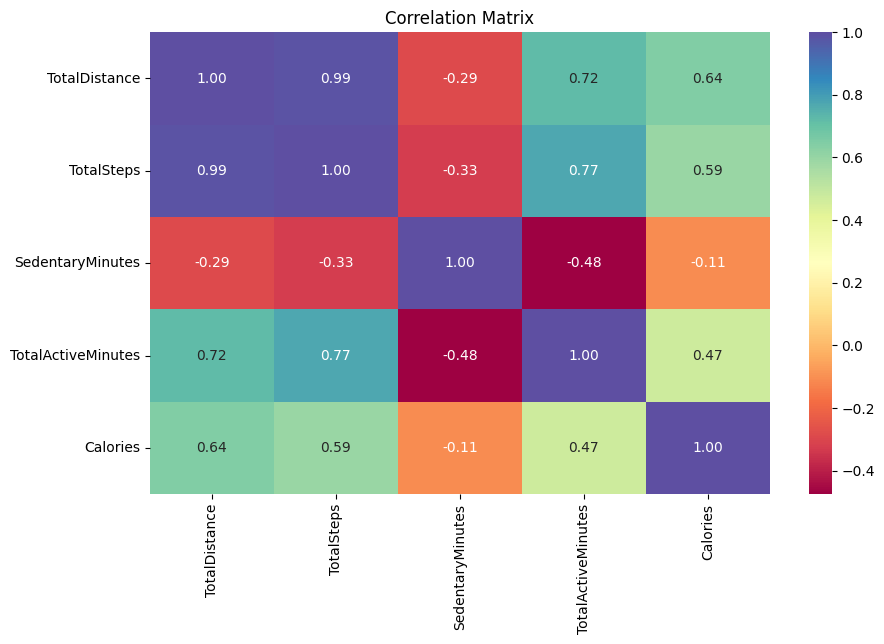

In [ ]:
Corr1 = ["TotalDistance", "TotalSteps",
         "SedentaryMinutes", "TotalActiveMinutes", "Calories"]

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(dailyActivity[Corr1].corr(),
            annot = True,
            fmt = ".2f",
           cmap="Spectral")

ax.set_title('Correlation Matrix');

Here we can see that:

1.   `Calories` show a positive correlation with `TotalActiveMinutes`, `TotalSteps`, and `TotalDistance`, meaning that as these variables increase, the number of calories burned also tends to increase.
2.   On the other hand, `Calories` exhibit a negative correlation with `SedentaryMinutes`. This indicates that as the time spent in a sedentary state increases, the number of calories burned tends to decrease. In other words, more sedentary behavior is associated with lower calorie expenditure.



### 5.2 Compare Columns (1)
From the previous key findings, we can further compare the columns in `TotalSteps`, `SedentaryMinutes`, and `Calories`. Here, I use scatterplot to be able to see the data spread clearly.

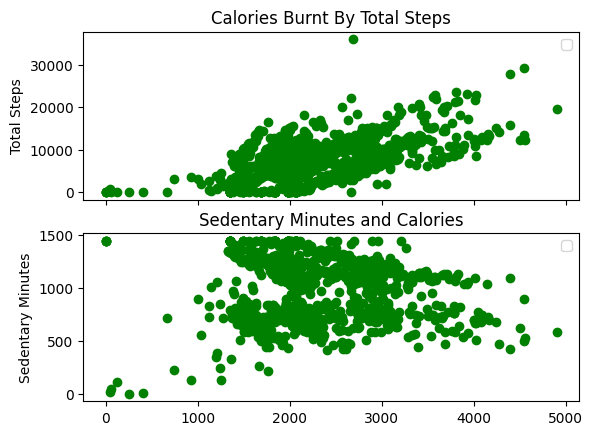

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows=2,
                             ncols=1,
                               sharex=True)

scatter = ax0.scatter(x=dailyActivity["Calories"],
                     y=dailyActivity["TotalSteps"],
                     color="green")
ax0.set(title="Calories Burnt By Total Steps",
       ylabel="Total Steps")

ax0.legend(*scatter.legend_elements(), title=None)

scatter = ax1.scatter(x=dailyActivity["Calories"],
                     y=dailyActivity["SedentaryMinutes"],
                     color="green")
ax1.set(title="Sedentary Minutes and Calories",
       ylabel="Sedentary Minutes")

ax1.legend(*scatter.legend_elements(), title=None);


Here, we can see that:
1.   The more steps a person takes, the more calories they are likely to burn. This is because physical activity, such as walking or running, requires energy expenditure, leading to an increase in calorie burning.

2.   Conversely, the more time a person spends in sedentary activities `SedentaryMinutes`, the fewer calories they are likely to burn. Sedentary activities typically involve minimal physical movement, leading to lower energy expenditure and, consequently, fewer calories being burnt.



### 5.3 Compare Columns (2)
Here I tried to compare the counts of `SedentaryMinutes` and `TotalActiveMinutes`

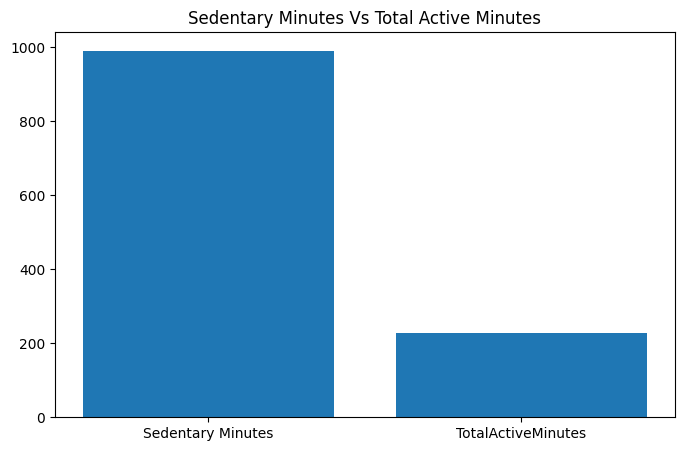

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
x = np.array(["Sedentary Minutes", "TotalActiveMinutes"])
y = np.array([dailyActivity["SedentaryMinutes"].mean(),
              dailyActivity["TotalActiveMinutes"].mean()])

plt.title("Sedentary Minutes Vs Total Active Minutes")
plt.bar(x, y, width = 0.8)
plt.show()

Here, we can see that:

1.   The data indicates that users spend more time in sedentary activities (sitting or lying down) compared to being active.
2.   A higher proportion of sedentary time might suggest that these users have a desk-bound job or a more sedentary lifestyle in general. Occupations that involve desk work, such as office jobs or computer-based roles, often require prolonged periods of sitting, which can contribute to increased sedentary time.




### 5.4 Compare Columns (3)
Here I visualize the total calories burnt by users of each week day.


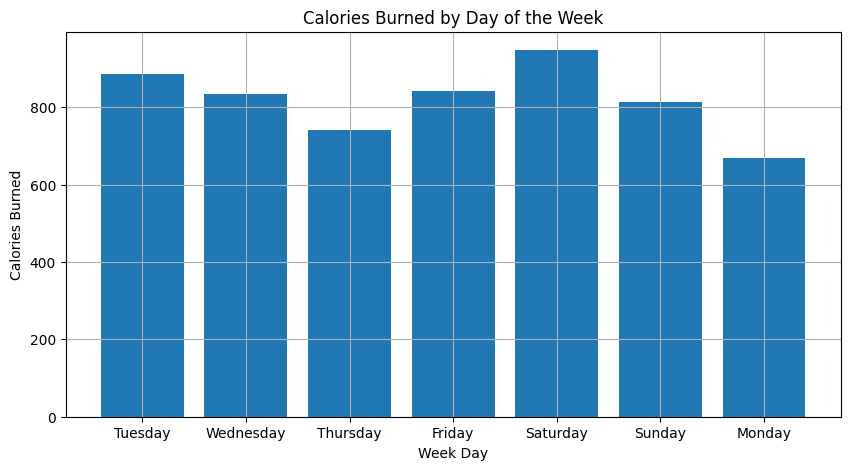

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(merge_df.Day, merge_df.Calories)
plt.xlabel("Week Day")
plt.ylabel("Calories Burned")
plt.title("Calories Burned by Day of the Week")
plt.grid()

plt.show()

Here, we can see that:


1.   The highest calorie expenditure occurred on Saturday, while the lowest was recorded on Monday. The notable increase in calories burned on Saturday is likely due to it being a weekend, allowing users more time for exercise and physical activities.
2.   The situation with Monday, however, appears perplexing as it is traditionally perceived as a busy workday for many individuals. One possible explanation that comes to mind is that users might be occupied with work tasks, spending prolonged periods behind their desks, which could leave limited time for exercise or breaks.
3.    In summary, the plot indicates a clear contrast in calorie burning between Saturday and Monday, with the former showing higher activity levels likely due to the weekend leisure opportunities, and the latter suggesting potential constraints on physical activity due to busy work schedules on Mondays.



From the previous finding, I also decide to plot the steps taken in each week days.

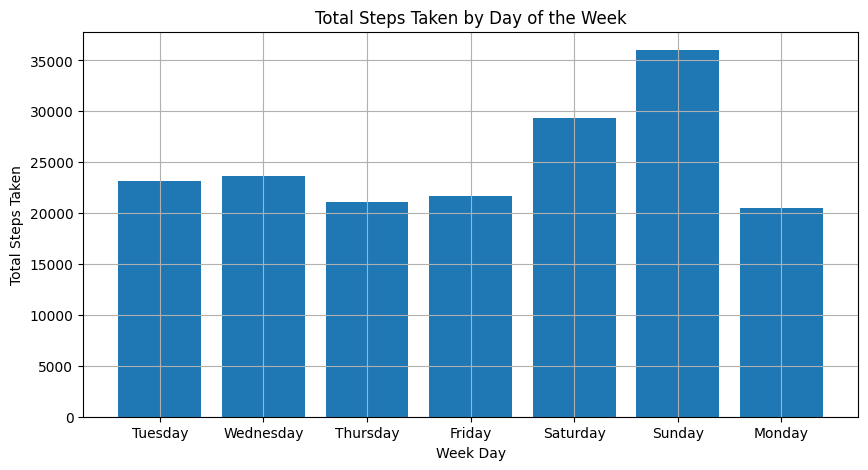

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(dailyActivity.Day, dailyActivity.TotalSteps)
plt.xlabel("Week Day")
plt.ylabel("Total Steps Taken")
plt.title("Total Steps Taken by Day of the Week")
plt.grid()
plt.show()

Here, we can see that:

1.   The plot provides a clear explanation for the lower calorie expenditure on Monday. The data reveals that users took the fewest steps on Monday compared to other days of the week, suggesting they likely spent more time sitting at their work desks.
2.   Additionally, this observation offers insights into the profile of the users, indicating that they are likely individuals with a working-class background.
3.   On the other hand, the data shows that the highest number of steps was recorded on Saturday and Sunday, which is expected, considering these are typically weekends when people have more opportunities for physical activity and outdoor pursuits.




###5.5 Compare Columns (4)

Here I plot the number of minutes sleep taken by users in each week days.

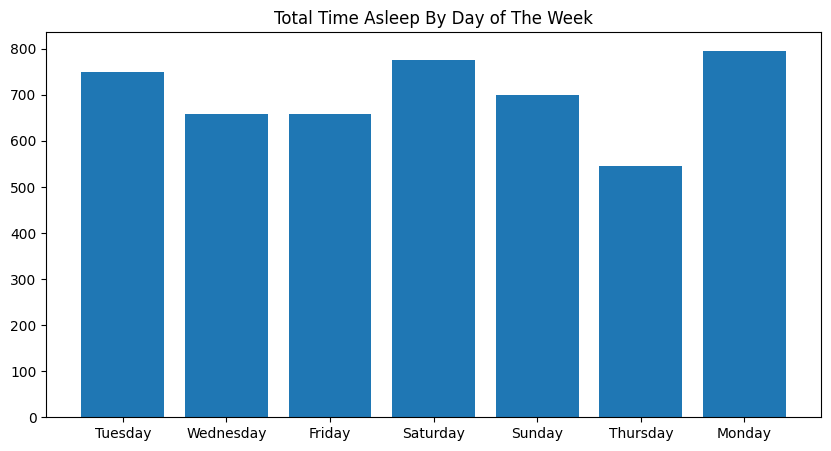

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
x = merge_df2["Day"]
y = merge_df2["TotalMinutesAsleep"]

plt.title("Total Time Asleep By Day of The Week")
plt.bar(x, y, width = 0.8)
plt.show()

Here, we can see that:


1.   Thursday had the least amount of sleep recorded, while Monday had the most. It is a common trend for people to sleep longer when they feel more exhausted.
2.  Interestingly, the users also slept longer on Saturday, Tuesday, and Sunday, which aligns with the days they experienced the highest calorie expenditure.
3.   In summary, the dataset suggests a correlation between sleep duration and calorie expenditure, with longer sleep durations seemingly associated with increased calorie burning on specific days of the week.



### 5.6 Compare Columns (5)
Here, I plot the total steps users taken for each hours.

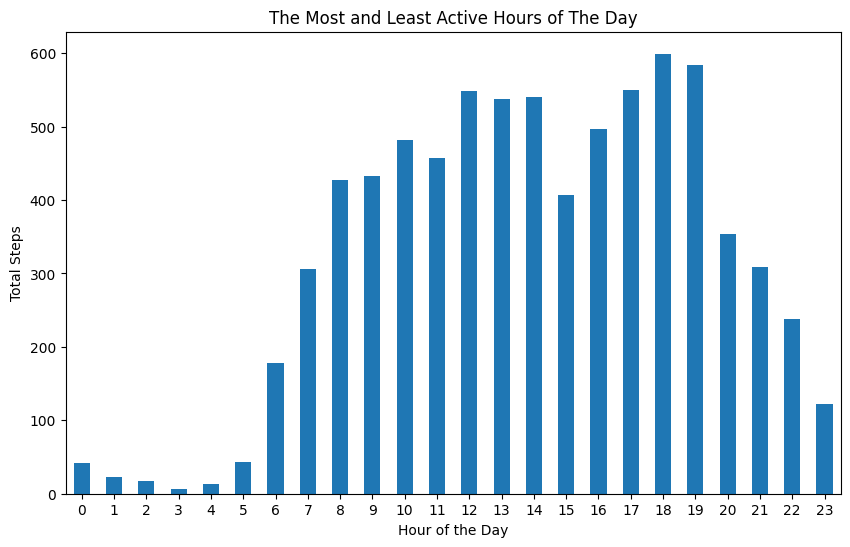

In [ ]:
fig, axs = plt.subplots(figsize=(10, 6))
merge_df.groupby(merge_df['DateHour'])['StepTotal'].mean().plot(kind='bar', rot=0, ax=axs, title='The Most and Least Active Hours of The Day')
plt.xlabel("Hour of the Day")
plt.ylabel("Total Steps")
plt.show()

Here, we can see that:

The data illustrates a significant increase in activity from 8 a.m. until 7 p.m., indicating that this period of the day is when they are most occupied. On the other hand, the hours between 8 p.m. and 10 p.m. show the least activity, suggesting that these might be opportune hours to target them with ads.


### 5.7 Identifying Trends and Relationships

In [ ]:
dailyActivity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,year,date,month
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.0,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,2016.0,15.787234,4.350000
std,2.424805e+09,5087.150742,3.924606,3.907276,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,0.0,8.536300,0.477224
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,1.000000,4.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,2016.0,9.000000,4.000000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,2016.0,16.000000,4.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,2016.0,23.000000,5.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,2016.0,30.000000,5.000000


1. The average of Steps for 33 Users is 7637. This is relatively low, based on the Health Line, healthy adults can take anywhere between 4000 - 18000 steps in a day. If we look into the data there are numbers of users who actually took more than 10000 steps a day. This indicated that the data still consist outliers.
2. The average distance is 5. However there are no informations containing what measures dose this data use. Whether it is in km, m, or miles.
3. Average calories for each users are 2303. This is still considered good, because the best calories for women is in 2000 and for men 2500.

In [ ]:
dailySteps.describe()

,Id,StepTotal,year,date,month
count,9.400000e+02,940.000000,940.0,940.000000,940.000000
mean,4.855407e+09,7637.910638,2016.0,15.787234,4.350000
std,2.424805e+09,5087.150742,0.0,8.536300,0.477224
min,1.503960e+09,0.000000,2016.0,1.000000,4.000000
25%,2.320127e+09,3789.750000,2016.0,9.000000,4.000000
50%,4.445115e+09,7405.500000,2016.0,16.000000,4.000000
75%,6.962181e+09,10727.000000,2016.0,23.000000,5.000000
max,8.877689e+09,36019.000000,2016.0,30.000000,5.000000


In [ ]:
sleepDay.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,year,date,month
count,4.130000e+02,413.000000,413.000000,413.000000,413.0,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225,2016.0,15.777240,4.358354
std,2.060360e+09,0.345521,118.344679,127.101607,0.0,8.704634,0.480098
min,1.503960e+09,1.000000,58.000000,61.000000,2016.0,1.000000,4.000000
25%,3.977334e+09,1.000000,361.000000,403.000000,2016.0,8.000000,4.000000
50%,4.702922e+09,1.000000,433.000000,463.000000,2016.0,16.000000,4.000000
75%,6.962181e+09,1.000000,490.000000,526.000000,2016.0,23.000000,5.000000
max,8.792010e+09,3.000000,796.000000,961.000000,2016.0,30.000000,5.000000


The average sleep minute for each users are 419 minutes. This is still in a good range. If converted into hours, it indicates the average sleep minutes for users are 7 hours.

In [ ]:
weightLogInfo.describe()

,Id,WeightKg,WeightPounds,BMI,LogId,year,date,month
count,6.700000e+01,67.000000,67.000000,67.000000,6.700000e+01,67.0,67.000000,67.000000
mean,7.009282e+09,72.035821,158.811801,25.185224,1.461772e+12,2016.0,14.835821,4.402985
std,1.950322e+09,13.923206,30.695415,3.066963,7.829948e+08,0.0,8.699699,0.494200
min,1.503960e+09,52.599998,115.963147,21.450001,1.460444e+12,2016.0,1.000000,4.000000
25%,6.962181e+09,61.400002,135.363832,23.959999,1.461079e+12,2016.0,8.000000,4.000000
50%,6.962181e+09,62.500000,137.788914,24.389999,1.461802e+12,2016.0,14.000000,4.000000
75%,8.877689e+09,85.049999,187.503152,25.559999,1.462375e+12,2016.0,21.500000,5.000000
max,8.877689e+09,133.500000,294.317120,47.540001,1.463098e+12,2016.0,30.000000,5.000000


The average weight for 8 users are 72 and BMI is 25. However we can't really indicate anything as there is no ither demografic information such as age and height. As for the BMI, the respondents can be considered overweight.

## Phase 6: Act



1.   According to the data, it was observed that many people struggle to reach the minimum recommended 10,000 steps per day for maintaining a healthy lifestyle. To tackle this challenge, Bellabeat can offer captivating tips on its website, regularly sharing advice to help consumers meet their daily goals. Moreover, the company can introduce interactive challenges to inspire users to walk regularly. By doing so, Bellabeat can boost user engagement and provide substantial benefits to its customers.
2.   Another observation I made is that people tend to spend a considerable amount of time being inactive compared to being active. This sedentary behavior is associated with various health issues, including obesity, heart disease, and stroke, among others. To address this concern, Bellabeat can create educational explainer videos and blogs to raise awareness among its users about the adverse effects of a sedentary lifestyle and how to prevent them. <br> This initiative also presents an excellent opportunity for Bellabeat to promote its other products, such as the Bellabeat app, which offers users valuable lifestyle-related health data, and Time, a companion product that integrates with the Bellabeat app, providing users with insightful information about their daily well-being. By doing so, Bellabeat can not only educate its users but also showcase the benefits of its additional products, encouraging a healthier and more active lifestyle.